# Ensemble Learning and Random Forest

Tingting Yang

INDE 577 - Data Science and Machine Learning

## Introduction

There are many machine learning algorithms can be selected, and crowd wisdom is achieved through ensemble learning. Ensemble learning is to combine multiple individual models together to improve the overall performance of the algorithm. It is designed to improve the stability and the accuracy of the machine learning algorithms. It can be used to solve both regression and classification tasks. When implement the ensemble learning, it assumes all the predictions are completely independent. Since it combines diverse models, it can be used regardless of the volume of the dataset.

#### One of simple ensemble learning techniques - Hard Voting Classifier

In classification, we could use a simple majority vote, "Hard Voting Classifier". Multiple models are used to make predictions for each data point, and the predictions by each model are considered as a separate vote. The prediction which got from majority of the models would be selected as the final prediction.

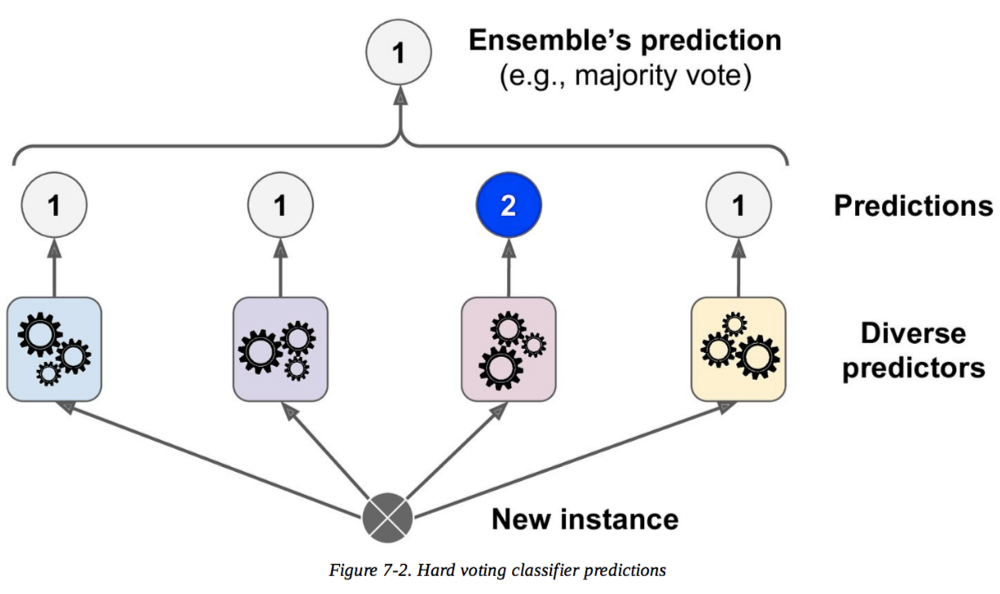

Besides Hard voting classifier, the averaging and weighted averaging techniques are also used in the ensemble learning. 

#### One of advanced ensemble learning techniques - Bagging (Bootstrap Aggregation)

Bagging can be used to reduce the variance of a decision tree. To implement bagging, multiple subsets are generated from the original dataset, selecting observations with replacement; Each learner trains the random subset and returns its prediction; Then just like the hard voting classifier, the bagged algorithm counts the votes and assigns the class with the most votes as the final prediction. 

Each learner might has a higher bias than the one trains the original dataset, however, the aggregation of the learners would reduce both bias and variance.

In this notebook, I will mainly use bagging for ensemble learning, but there are other advanced ensemble learning techniques for machine learning, e.g., **Stacking** and **Boosting**. Stacking is to fit different models on the same data and use another model to learn how to best combine the predictions, while Boosting is to add models sequentially to correct the predictions of the prior models. 

### Random Forest

One of the most popular ensemble learning techniques is Random Forest, which is also an extension over bagging.

In nature, a group of trees makes a forest. Just like its name, an ensemble of decision trees is a random forest. In random forest, multiple subsets are generated from the training dataset and trained by a group of dicision tree classifiers to make individual predictions according to the different subsets of the training data; Each tree votes, and the prediction with the most votes would be selected as the final prediction.


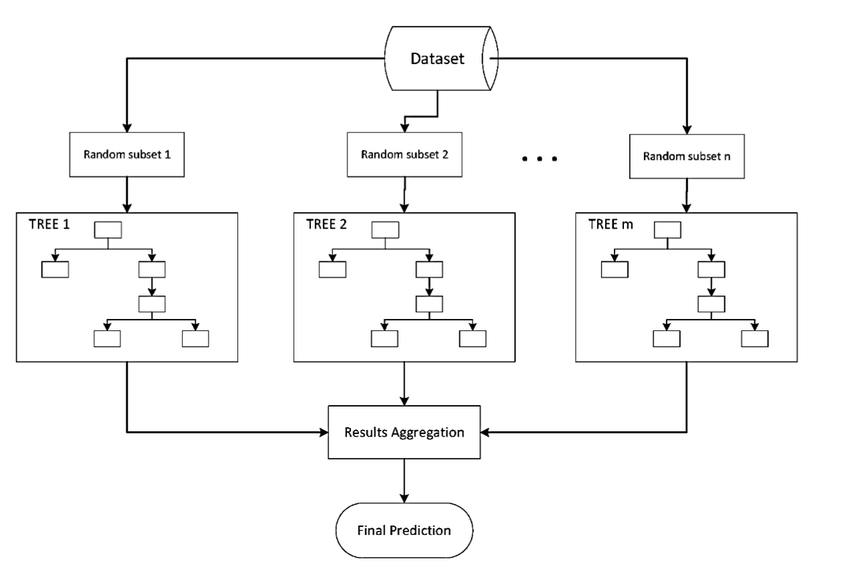

Random forest decides where to split based on a random selection of features. Since each tree splits based on different features, random forest implements a level of differentiation, which provides a greater ensemble to aggregate over, and thus, producing a more accurate predictor. However, random forest needs more resources for computation and takes more time.

---

## Implement

In the following notebook, I will use ensemble learning algorithms for species classification using the [Penguin dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris). The three ensemble learning models will be used:

* Random forest

* Multilayer Perceptron, Logistic Regrssion, and Random Forest algorithms will be combined together, and the hard voting classifier will be used to select the final prediction. 

* Multiple decision trees will be constructed using bagging strategy.

* Multiple MLP will be constructed using bagging strategy.

### About the dataset

The dataset consists of 344 rows and 7 columns. There are three different species of penguins: Chinstrap, Adélie, and Gentoo penguins. The columns are:

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill: bill length (mm)
* bill_depth_mm: bill depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

Since I have used the penguin dataset in several other algorithms (K Means, Gradient Descent, and Perceptron), I will directly wrangle the data (e.g., remove the rows with NaN values), and choose "bill_length_mm" and "bill_depth_mm" as the predictors since these two predictors can separate the three penguin species well.

### Goal

Using the length and the depth of the bill to classify the penguins species by the three ensemble learning algorithms, and compare the performances with the individual models.

### Tools

In order to do this, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [sklearn](https://scikit-learn.org/stable/index.html)
* [seaborn](https://seaborn.pydata.org/)

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

---

### Data Exploration and Data Wrangling

After importing the dataset, we simply plot the scatter plot to have an overall impression of the data distribution.

In [2]:
# Import Penguins dataset
penguins = pd.read_csv("penguins.csv")

# Remove the rows with NaN values from the dataset
penguins = penguins.dropna()

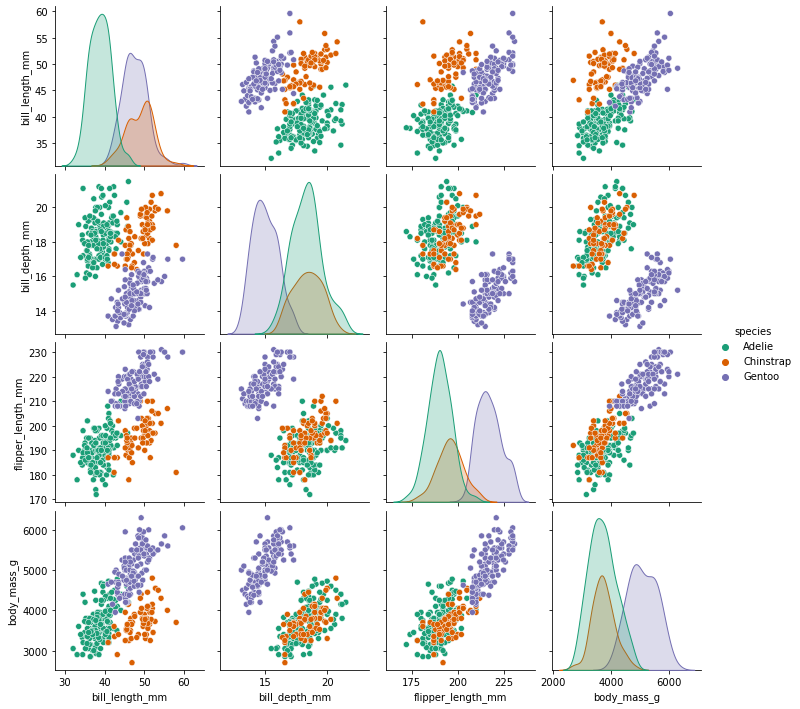

In [3]:
sns.pairplot(penguins, hue='species',palette='Dark2')

Text(0.5, 1.0, 'Penguins Data')

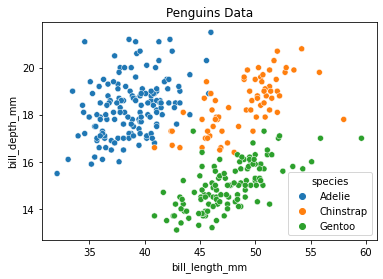

In [4]:
sns.scatterplot(data = penguins, x = "bill_length_mm", y = "bill_depth_mm", hue = 'species').set_title("Penguins Data")

From the scatter plot above, "bill_length_mm" and "bill_depth_mm", can separate the three pinguin species well. And thus, I will use these two features as predictors.

In [5]:
# Extract out desired features from Penguins Dataset, and covert features to numpy array
X = penguins[['bill_length_mm', 'bill_depth_mm']].to_numpy()

# Extract out labels, and convert labels to numpy array
y = penguins['species'].to_numpy()

# Change labels to numeric labels
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0.0
    elif label == "Chinstrap":
        y[i] = 1.0
    else:
        y[i] = 2.0
        
# Change the type of y to meet the needs of the usage of models
y = y.tolist()

### Train and Test Data Split

In [6]:
# Use the train_test_split function in sklearn package
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)

---

### Ensemble learning 1 - Random Forest

I use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) in [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) to implement the random forest. 

After calculate the mean accuracy of the random forest, I will also implement the individual decision tree algorithm and compare the performances of these two models.

To implement decision tree algorithm, I will use the tool, [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier) in sklearn. 

To compare the performance, I will check the accuracy. The [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score) tool can help to calculate the accuracy.

In [7]:
# Import the classifier
from sklearn.ensemble import RandomForestClassifier

# Train the training set
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [8]:
# Import the tool form sklearn
from sklearn.metrics import accuracy_score

# Predict the test data and calculate the accuracy
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9328358208955224


The accuracy of the random forest on the testing set is 0.93, which is pretty good 

Let's compare the random forest model with the individual decision tree!

In [9]:
# Import the tools form sklearn
from sklearn.tree import DecisionTreeClassifier

# Set up the decision tree and train the training set
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
# Predict the test data and calculate the accuracy
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9029850746268657


The accuracy of the decision tree is lower than that of the random forest, suggesting that the performance of the random forest algorithm is better than the individual decision tree model.

What if we combine the random forest with other two different models to predict?

---

### Ensemble learning 2

In this part, Multilayer Perceptron, Logistic Regrssion, and Random Forest algorithms will be combined together, and the hard voting classifier will be used to select the final prediction. We will compare the performances of the three individual models and the ensemble model.

We directly use the classifier provided by sklearn, [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier).

To use hard voting classifier, We directly use the tool [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) provided by [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) and set voting = 'hard'.

In [11]:
# Import the tools form sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [12]:
# Set up ensemble learners with hard voting classifier
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')

In [13]:
# Train the training set
voting_clf.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

Let's chech the accuracy of the three individual models and the ensemble model.

In [14]:
# Fit 3 models and the ensemble model, and print the accuracy
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')    

LogisticRegression, accuracy score = 0.9552238805970149
MLPClassifier, accuracy score = 0.3283582089552239
RandomForestClassifier, accuracy score = 0.9402985074626866
VotingClassifier, accuracy score = 0.9552238805970149


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The ensemble model with hard voting classifier has a slightly higher accuracy than the multilayer preceptron nodel and the random forest model, which is the same as the accuracy of the logistic regression. Thus, the ensemble model with hard voting classifier works better (not worse) than the other individual algorithms in this case.

---

### Ensemble learning 2

In this part, multiple decision trees will be constructed using bagging strategy. 

To achieve, we use the tools, [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=baggingclassifier#sklearn.ensemble.BaggingClassifier) and [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier) in sklearn. 

In [15]:
# Import the tools form sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Set up the ensemble model
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap = True, 
                            n_jobs = -1)

In [16]:
# Train the training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [17]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.8955223880597015

Recall the results of the individual decision tree above, the accuracy of the individual decision tree is 0.90, which is close to the accuracy of this ensemble model with bagging. 

---

### Ensemble learning 3

Let's choose the MLP, whose accuracy is only 0.79, and explore whether an ensemble model with bagging can improve the accuracy of the algorithm.

In [18]:
# Set up the ensemble model
bag2_clf = BaggingClassifier(MLPClassifier(), 
                             n_estimators=500, 
                             max_samples=100, 
                             bootstrap = True, 
                             n_jobs = -1)

In [19]:
# Train the training set
bag2_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [20]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.8955223880597015

The accuracy of this ensemble model with bagging is 0.89, which is higher than the accuracy of the individual MLP model. 

Notably, the computation time of this ensemble model is quite long. 

---

## Conclusion

In most case, the ensemble learning model performs better than the individual algorithms. However, this is not always the case. In the meantime, the ensemble learning model needs more computational space and time to implement. 